In [1]:
import tarfile
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import cv2

In [2]:
# Extract file
file = tarfile.open('/kaggle/input/lfw-data/lfw-funneled.tgz')
file.extractall("/kaggle/working/")
file.close()

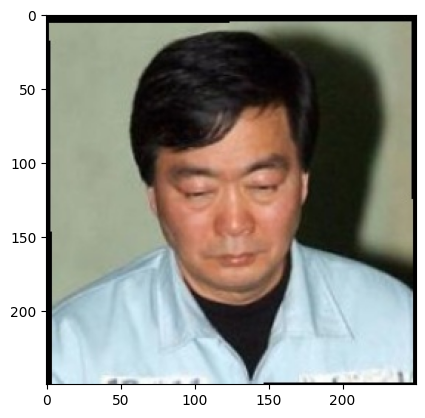

In [3]:
# Preview first image
base_image_path = "/kaggle/working/lfw_funneled/"
dir_names = os.listdir(base_image_path)
first_image_name = os.listdir(base_image_path + dir_names[0])
np_img = np.asarray(Image.open(base_image_path + dir_names[0] + "/" + first_image_name[0]))
plt.imshow(np_img)
# plt.xlabel(first_image_name[1])

In [4]:
print(f"Number of Candidates: {len(dir_names)}")
counter = 0
for dir_name in dir_names:
    try:
        file_names = os.listdir(base_image_path + dir_name)
        for file_name in file_names:
            counter += 1
    except:
        continue
print(f"Number of Files: {counter}")

Number of Candidates: 5760
Number of Files: 13233


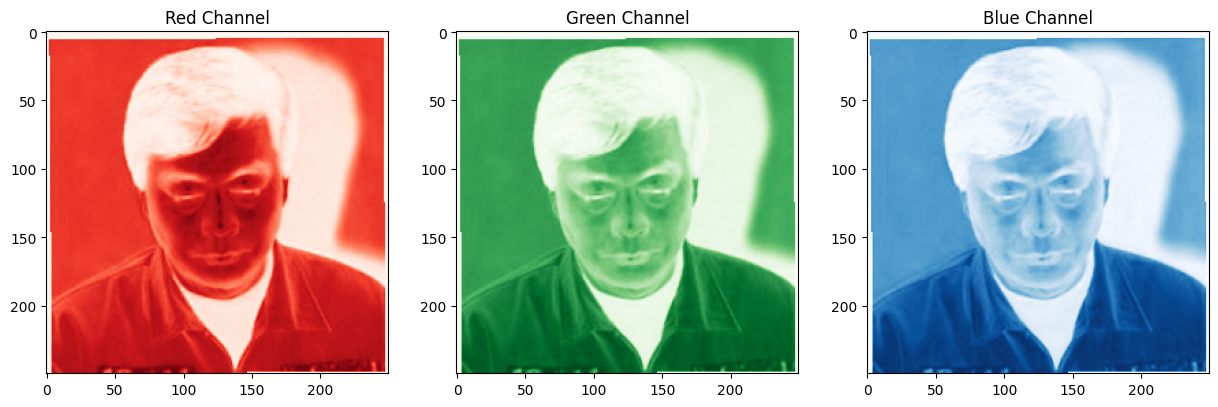

In [5]:
# Display RGB Image
fig, axs = plt.subplots(1,3,figsize=(15, 5))
axs[0].imshow(np_img[:,:,0], cmap='Reds')
axs[1].imshow(np_img[:,:,1], cmap='Greens')
axs[2].imshow(np_img[:,:,2], cmap='Blues')
axs[0].set_title("Red Channel")
axs[1].set_title("Green Channel")
axs[2].set_title("Blue Channel")
plt.show()


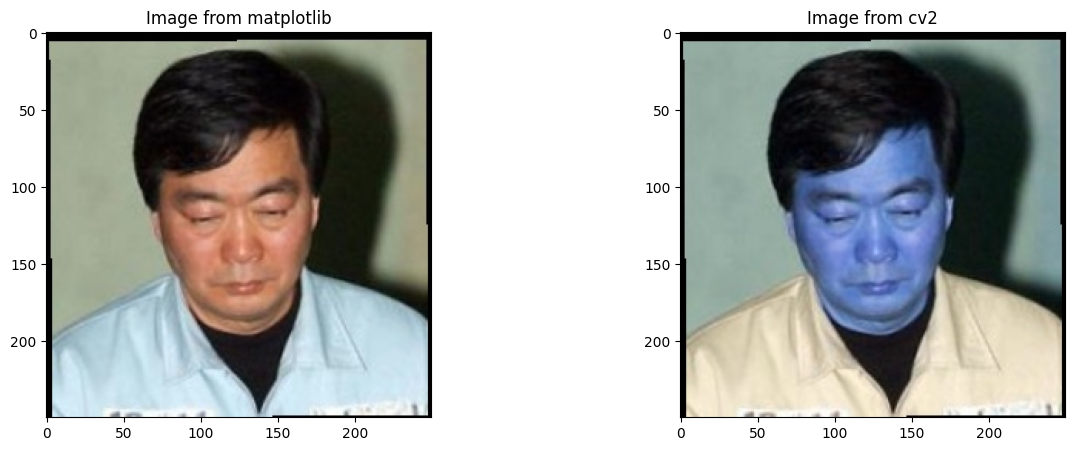

In [6]:
# Read image using matplotlib and cv2
plt_img = plt.imread(base_image_path + dir_names[0] + "/" + first_image_name[0])
cv2_img = cv2.imread(base_image_path + dir_names[0] + "/" + first_image_name[0])
fig, axs = plt.subplots(1,2,figsize=(15,5))
axs[0].imshow(plt_img)
axs[1].imshow(cv2_img)
axs[0].set_title("Image from matplotlib")
axs[1].set_title("Image from cv2")
plt.show()

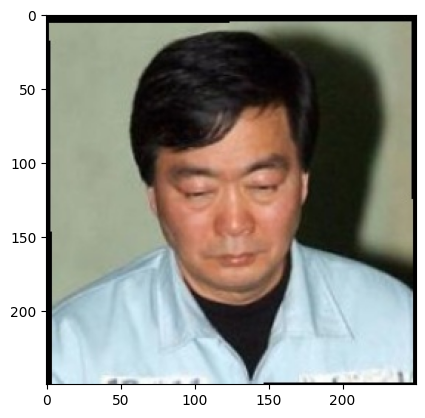

In [7]:
# Convert BGR to RGB in cv2
cv2_img_rgb = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
plt.imshow(cv2_img_rgb)

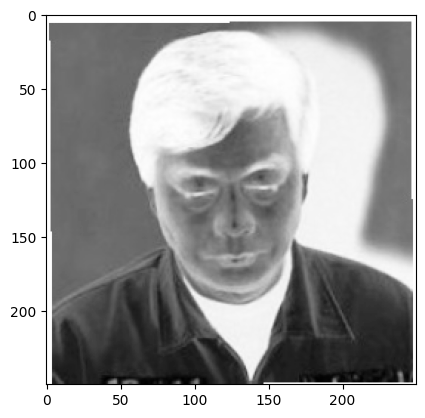

In [8]:
#Convert Image to gray_scale
cv2_img_gray = cv2.cvtColor(plt_img, cv2.COLOR_RGB2GRAY)
plt.imshow(cv2_img_gray, cmap="Greys")

(46875,)


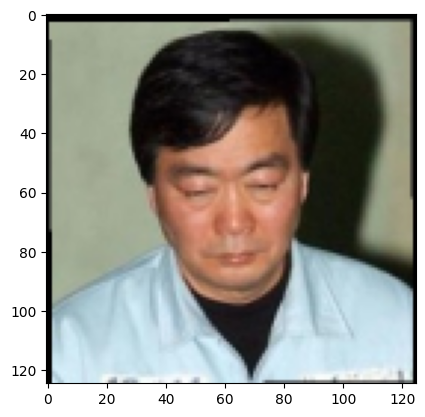

In [9]:
# Apply Resizing for image
cv2_img_resized = cv2.resize(plt_img, None, fx=0.50, fy=0.50)
plt.imshow(cv2_img_resized)
print(cv2_img_resized.flatten().shape)

RAW Image: (187500,)
Image after applying PCA: (62500,)


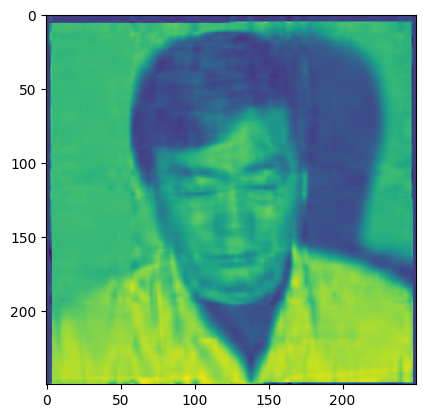

In [10]:
# Apply PCA for image
pca = PCA(n_components=15)
img_pca = pca.fit_transform(plt_img.mean(axis=2))
img_pca_projection = pca.inverse_transform(img_pca)
print(f"RAW Image: {plt_img.flatten().shape}")
print(f"Image after applying PCA: {img_pca_projection.flatten().shape}")
plt.imshow(img_pca_projection)

Image after clustered with 16 colors: (187500,)


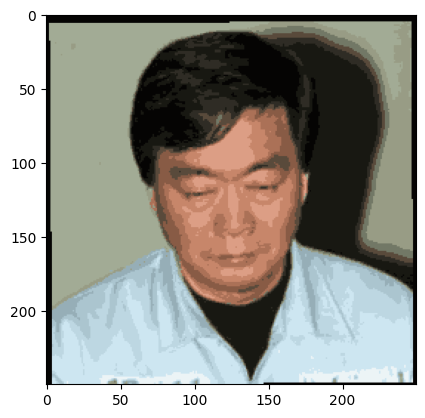

In [11]:
# Image Segmentation by K-mean Clustering for the first image with 16 colors
from sklearn.cluster import KMeans
X = np_img.reshape(-1, 3)
Kmeans = KMeans(n_clusters=16,n_init=10)
Kmeans.fit(X)
segmented_img = Kmeans.cluster_centers_[Kmeans.labels_]
segmented_img = segmented_img.reshape(np_img.shape)
segmented_img = segmented_img/255
plt.imshow(segmented_img)
print(f"Image after clustered with 16 colors: {segmented_img.flatten().shape}")


RAW Image: (187500,)
Image after applying Resized and PCA: (15625,)


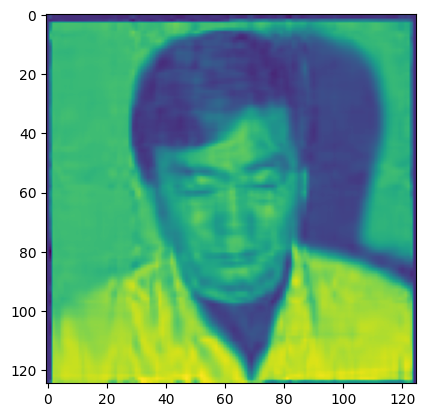

In [12]:
# Combined Resized and PCA
img_pca = pca.fit_transform(cv2_img_resized.mean(axis=2))
img_pca_projection = pca.inverse_transform(img_pca)
print(f"RAW Image: {plt_img.flatten().shape}")
print(f"Image after applying Resized and PCA: {img_pca_projection.flatten().shape}")
plt.imshow(img_pca_projection)

RAW Image: (187500,)
Image after applying Resized, K-means clusttering 16 colors, PCA: (15625,)


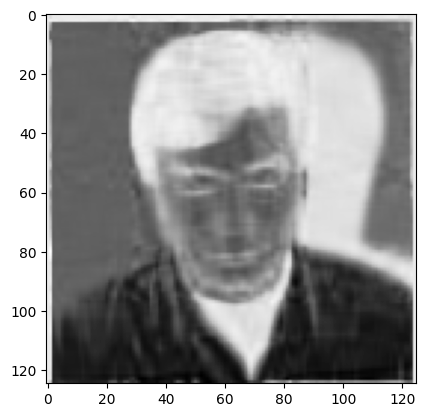

In [13]:
# Combined Resized, K-means clusttering 16 colors, PCA

cv2_img_resized = cv2.resize(segmented_img, None, fx=0.50, fy=0.50)
img_pca = pca.fit_transform(cv2_img_resized.mean(axis=2))
img_pca_projection = pca.inverse_transform(img_pca)
print(f"RAW Image: {plt_img.flatten().shape}")
print(f"Image after applying Resized, K-means clusttering 16 colors, PCA: {img_pca_projection.flatten().shape}")
plt.imshow(img_pca_projection ,cmap="Greys")



<Axes: ylabel='Count'>

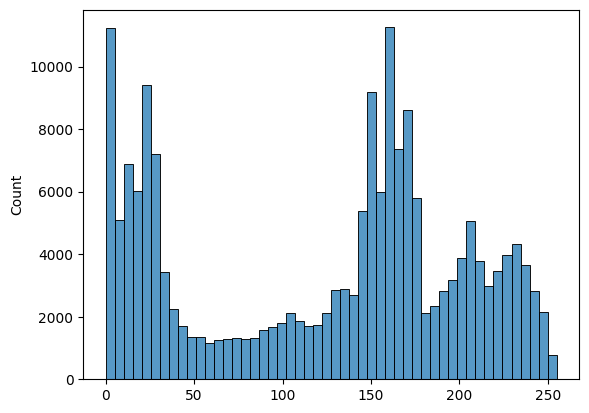

In [14]:
sns.histplot(plt_img.flatten())

<Axes: ylabel='Count'>

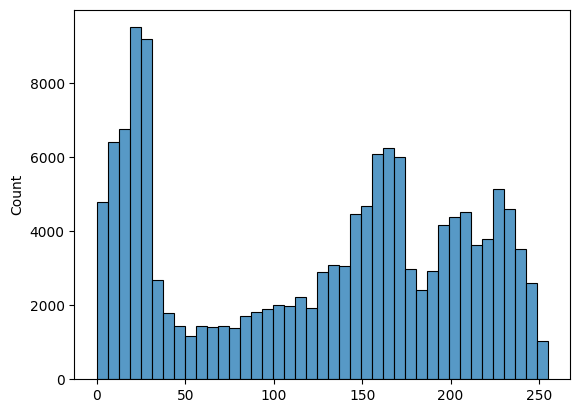

In [15]:
img_cropped = plt_img[30:, 30:, :]
# plt.imshow(img_cropped)
sns.histplot(img_cropped.flatten())

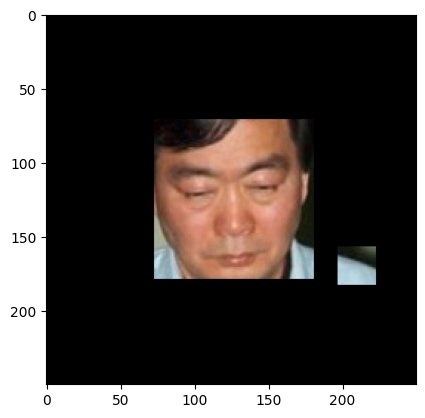

In [83]:
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade-frontalface-default/haarcascade_frontalface_default.xml')
gray_img = cv2.cvtColor(plt_img, cv2.COLOR_RGB2GRAY)
faces = face_cascade.detectMultiScale(gray_img, 1.1, 1)
new_img = np.zeros_like(plt_img)
for (x,y,w,h) in faces:
    new_img[x:x+w, y:y+h] = plt_img[x:x+w, y:y+h]
plt.imshow(new_img)
    

In [198]:
# Choosing Image Resize + Image Cropping + Grayscale
images = []
targets = []
unique = 0
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade-frontalface-default/haarcascade_frontalface_default.xml')
for dir_name in dir_names:
    try:
        file_names = os.listdir(base_image_path + dir_name)
        if(len(file_names) >= 20):
            unique = unique + 1
            for file_name in file_names:
                img = plt.imread(f"{base_image_path}{dir_name}/{file_name}")
#                 new_img = np.zeros_like(img)
                try:
#                     gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#                     faces = face_cascade.detectMultiScale(gray_img, 1.2, 1)
#                     for (x,y,w,h) in faces:
#                         new_img[x:x+w, y:y+h] = img[x:x+w, y:y+h]
#                     img = new_img
                    img = img[30:, 30:]
                    img = cv2.resize(img, None, fx=0.75, fy=0.75)
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    img = img.flatten()
                    images.append(img)
                    targets.append(dir_name)
                except:
                    continue
                    
    except:
        continue
images = np.asarray(images)
targets = np.asarray(targets)
print(f"Number of identities: {unique}")


Number of identities: 62


In [199]:
images.shape

(3023, 27225)

In [200]:
targets.shape

(3023,)

In [201]:
# Apply StandardScaler
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)

<Axes: ylabel='Count'>

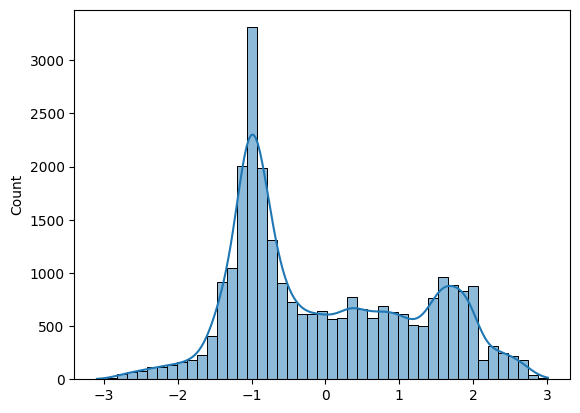

In [202]:
# Check an image after scaled
sns.histplot(images_scaled[0], kde=True)

In [203]:
# Apply Principle Component Analysis with 95% of variance radio
pca = PCA(0.95)
images_pca = pca.fit_transform(images_scaled)

In [148]:
#Apply K-Mean Cluster 16-colors
# from sklearn.cluster import KMeans
# Kmeans = KMeans(n_clusters=16,n_init=10)
# Kmeans.fit(X=images_pca)
# images_segmented = Kmeans.cluster_centers_[Kmeans.labels_]
# images_segmented.shape

(2370, 398)

In [214]:
images_pca.shape

(3023, 420)

In [204]:
df = pd.DataFrame(images_pca, targets)

In [205]:
df.reset_index(inplace=True)
df.head()

,index,0,1,2,3,4,5,6,7,8,...,410,411,412,413,414,415,416,417,418,419
0,Lleyton_Hewitt,11.394436,68.180486,-7.824399,2.589297,-19.414510,19.752369,28.901068,-48.763605,5.501184,...,1.026614,-0.963440,1.117105,0.939258,0.651611,0.931764,2.270759,-2.225124,-4.118132,0.383578
1,Lleyton_Hewitt,-29.907178,9.137088,-6.458020,27.486292,-60.870714,-13.885530,-45.342185,-30.250593,58.462340,...,-0.174310,0.487004,-0.377452,-2.433260,-1.442486,0.830011,1.160630,3.887079,1.426529,2.225987
2,Lleyton_Hewitt,39.039774,78.488936,47.353161,56.870106,-23.375320,-25.186189,-12.852055,-24.539865,-4.199294,...,1.779247,0.671319,-1.722233,-3.660596,0.461831,1.182952,-2.023884,-0.098312,-4.017814,2.940247
3,Lleyton_Hewitt,-58.220990,69.377898,2.369741,17.656987,-32.105240,-41.484160,-4.258997,-15.120815,-21.288706,...,-2.919181,-0.254957,-2.236825,2.159047,4.935139,1.575052,-4.406456,-1.275093,-0.138908,-2.774215
4,Lleyton_Hewitt,-94.894086,4.981346,-30.257282,98.528240,2.602818,21.102331,1.494327,53.157216,4.627097,...,-1.125135,1.596475,-0.794549,-0.129356,-2.214919,4.297151,-1.011103,0.837679,-0.952100,-4.461900


In [206]:
df.rename(columns={'index':'target'}, inplace=True)
df.head()

,target,0,1,2,3,4,5,6,7,8,...,410,411,412,413,414,415,416,417,418,419
0,Lleyton_Hewitt,11.394436,68.180486,-7.824399,2.589297,-19.414510,19.752369,28.901068,-48.763605,5.501184,...,1.026614,-0.963440,1.117105,0.939258,0.651611,0.931764,2.270759,-2.225124,-4.118132,0.383578
1,Lleyton_Hewitt,-29.907178,9.137088,-6.458020,27.486292,-60.870714,-13.885530,-45.342185,-30.250593,58.462340,...,-0.174310,0.487004,-0.377452,-2.433260,-1.442486,0.830011,1.160630,3.887079,1.426529,2.225987
2,Lleyton_Hewitt,39.039774,78.488936,47.353161,56.870106,-23.375320,-25.186189,-12.852055,-24.539865,-4.199294,...,1.779247,0.671319,-1.722233,-3.660596,0.461831,1.182952,-2.023884,-0.098312,-4.017814,2.940247
3,Lleyton_Hewitt,-58.220990,69.377898,2.369741,17.656987,-32.105240,-41.484160,-4.258997,-15.120815,-21.288706,...,-2.919181,-0.254957,-2.236825,2.159047,4.935139,1.575052,-4.406456,-1.275093,-0.138908,-2.774215
4,Lleyton_Hewitt,-94.894086,4.981346,-30.257282,98.528240,2.602818,21.102331,1.494327,53.157216,4.627097,...,-1.125135,1.596475,-0.794549,-0.129356,-2.214919,4.297151,-1.011103,0.837679,-0.952100,-4.461900


In [207]:
X = df.drop('target', axis=1)
y = df['target']

In [208]:
from sklearn import svm
clf = svm.SVC(class_weight='balanced',
 decision_function_shape='ovo',
 gamma='scale',
 kernel='linear')

In [220]:
# Split data to train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
clf.fit(X_train, y_train)

SVC(class_weight='balanced', decision_function_shape='ovo', kernel='linear')

In [221]:
y_pred = clf.predict(X_test)

In [222]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6005291005291006

In [223]:
# Apply 5 folds cross_validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.5785124 , 0.61157025, 0.59504132, 0.58940397, 0.60596026])

In [213]:
# Apply Grid Search
from sklearn.model_selection import GridSearchCV
params = {
    'kernel':('linear', 'poly', 'rbf'),
    'gamma': ('scale', 'auto'),
    'class_weight': ('balanced', None),
    'decision_function_shape': ('ovo', 'ovr')
}
grid_clf = GridSearchCV(estimator=svm.SVC(),param_grid=params)
grid_clf.fit(X, y)
grid_clf.best_params_

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'linear'}